# ANÁLISIS EXPLORATORIO DATASET : WINE

Para el Análisis de este dataset, se han utilizado los paquetes de Python, con el objetivo de la manipulación de los datos para obtener confiabilidad en ellos. 
La ingesta de datos se realizó desde un archivo con formato .cvs, nombrado "wine-clustering.csv".

In [524]:
#https://github.com/IngGuillerminaOlivares/Data-Science.git
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#from sklearn.preprocessing import StandardScaler
from scipy.stats.mstats import winsorize
import numpy as np

#__________MODELO DE CLASIFICACIÓN___________
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
%matplotlib inline

os.getcwd()

'C:\\Users\\elnir\\Downloads\\1.2. Analisis Exploratorio_ok\\Analisis Exploratorio 2024'

In [375]:
ds_wine = pd.read_csv("wine-clustering.csv") #Carga del Dataset

__DATA DISCOVERY__

Para conocer los registros contenidos en el dataset, se aplican funciones tales como : columns, dtypes, shape, size, head, info(), describe().
Se puede ver que el dataset contiene 178 registros con 13 caracteristicas o atributos.

In [376]:
print('Nombre columnas:', ds_wine.columns)

Nombre columnas: Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')


In [377]:
ds_wine.dtypes

Alcohol                 float64
Malic_Acid              float64
Ash                     float64
Ash_Alcanity            float64
Magnesium                 int64
Total_Phenols           float64
Flavanoids              float64
Nonflavanoid_Phenols    float64
Proanthocyanins         float64
Color_Intensity         float64
Hue                     float64
OD280                   float64
Proline                   int64
dtype: object

In [378]:
print('Cantidad de Filas y columnas:', ds_wine.shape)

Cantidad de Filas y columnas: (178, 13)


In [379]:
ds_wine.size #tamaño del dataset (filas*columnas)

2314

In [380]:
ds_wine.head(178) # Chequeo de lectura del Dataset.

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [381]:
ds_wine.info() # Visualizamos caracteristicas del dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


Se puede ver que el dataset no contiene valores categóricos, sólo contiene valores numéricos.

In [382]:
ds_wine.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


Mediante la función describe() podemos ver los valores máximos, mínimos y los diferentes cuartiles, media, desviación estandar y la cantidad total de valores por columna.

__ANÁLISIS DE ATRIBUTOS DEL CONTEXTO__

### Introducción: 

Un vino, es el resultado del trabajo en conjunto del hombre con la naturaleza. Los ingredientes que componen un vino son los responsables de caracterizar que un vino sea corriente o que sea una obra de arte para el deleite, es por esto, que la Industria Vitivinícola se enfoca es buscar la mejor combinación de la mejor materia prima, para obtener un vino de alta calidad, que se destaque en aroma, color, sabor, textura, entre otras. La calidad de un vino definirá el precio de venta al público y su estatus en su zona o el mundo, lo cual es el principal desafío de un países productores.

Estudio del contexto del dataset:
Para este conjunto de datos, podemos clasificar los atributos en: Alcoholes, Ácidos orgánicos, Residuos inorgánicos, Sales minerales, Compuestos Fenólicos Naturales, Aminoácidos, Cromaticidad, y Métodos de estabilización proteica.

**Alcoholes**:
    
   _Alcohol_= Alcohol: Graduación etílica del vino, tienen una gran importancia en todas las fases de la cata: visual, olfativa y gustativa. Es uno conservantes natural, mayor graduación, mayor estabilidad. Varía, aproximadamente, entre el 10% y el 16% del volumen de vino, el nivel mínimo es de 8%.

**Ácidos orgánicos**:

   _Malic_Acid_ = Ácido málico = Este ácidos se origina en las uvas debido a la fermentación del alcohol, e indica la madurez que tiene la uva. Junto al alcohol y los taninos, este ácido es responsables del equilibrio de sabores y conservación del vino. La concentración de Ácido málico es muy variable, desde 0 g/L como mínimo hasta 8 g/L aproximadamente. Un vino blanco tiene mayor presencia de Ácido málico dando vivacidad, pero en un vino tinto afecta el equilibrio.

**Residuo inorgánico**:

   _Ash_ = Cenizas= Residuo que permanecen después de la evaporación e incineración del vino, el contenido de cenizas permite evaluar la calidad y posibles adulteraciones de color, acidez y agua. Los vinos tintos tienen mayor contenido de ceniza que los vinos blancos, las cenizas en los vinos oscilan entre 1 y 3 g/l, y 2,5 g/l en promedio. 
                    
   _Ash_Alcanity_= Alcalinidad de cenizas: Es la suma total de cationes de amonio que se encuentran mezclados en los ácidos orgánicos del vino. Los cationes constituyen la mayor parte de las cenizas y comprenden potasio, sodio, calcio, magnesio, hierro, cobre, plomo, arsénico y otros elementos. Representar un índice de seguridad para identificar adulteraciones. Se mide en mili equivalentes por litro o gramos de carbonato de potasio por litro, y no hay un limite o tolerancia definida.
   
**Sales minerales**:

   _Magnesium_= Magnesio= Es un protector contra el estrés del vino, puede ayudar a prevenir la muerte celular causada por el choque térmico y la toxicidad del etano. Su presencia en el vino se sitúa habitualmente entre 50-200 mg/l (Sólo unos pocos vinos franceses contienen niveles que los superan).

**Compuestos Fenólicos Naturales:** 

Los Fenoles son componentes del vino responsables de darle el color, el sabor amargo y la astringencia. Esta percepción oral es uno de los principales factores de calidad y autenticidad en el vinos tintos. La cantidad presente de estas sustancias depende de la variedad de uva de que se trate. Se encuentran en las pieles y en las pepitas. Junto con la acidez, tienen una enorme importancia en la capacidad de envejecimiento de un vino. La diferencia entre un vino blanco y uno tinto se debe principalmente a estos compuestos
Hay 2 tipos de compuestos fenólicos: Flavonoides y No Flavonoides.

   _Total_Phenols_ = Total de Fenoles = La acidez total refleja la suma de todos los ácidos del vino. Los valores más habituales del índice Folin-Ciocalteu para vino blanco son 3 a 5, para rosados 5 a 10 y para tintos de 20 a 50.

   _Flavanoids_= Flavonoides= suma de flavonoides  
         _Proanthocyanins_ = Proantocianidinas: flavonoide más importante, encontrado en la piel de la uva, ayuda a la percepción del vino en la degustación, especialmente en su astringencia y amargor. Se pueden agregar otros taninos ecológicos por ejemplo los extraídos de la nuez o de una madera. La concentración de taninos condensados/proantocianidinas varía de proximadamente 0.3 - 5.5 g/L
  
   _Nonflavanoid_Phenols_ = No flavonoides: Frecuentes en la pulpa de la uva funcionan como factor en la pigmentación, además de participar en la oxidación. Son los más importantes en los vinos blancos.
   
**Aminoácidos:**

   _Proline_: Prolina= Aminoácido que se encuentra en el jugo de la uva. L-prolina aumenta la dulzura, la viscosidad y el sabor del fruto, disminuye el amargor y la astringencia.   

**Cromaticidad:**
 Factores como matiz e intensidad pueden brindar información sobre la calidad del vino.
  
   _Color_Intensity_ = Intensidad del color: Se refiere a la proporción de antocianinas que afecta el color del vino. Son unos polifenoles de color rojo, morado o azul, presentes en el vino tinto. Estas sustancias cuando se oxidan pasan de ese color azul o morado a rojo y de rojo a amarillo y esto pueden ayudarnos a determinar la edad de un vino en la fase visual y permite diferencias los vinos entre pálido, medio u oscuro. 

   _Hue_ = Matiz: Los vinos con una tonalidad más roja tienen un pH más bajo (alta acidez). Los vinos con un tono de color violeta oscilan entre 3,4 y 3,6 pH (en promedio). Los vinos con un tinte más azulado (casi como magenta) tienen un pH superior a 3,6 y posiblemente más cercano a 4 (baja acidez). 
Este atributo claramente nos permitirá hacer una clasificación de los vinos.

   El PH mide el grado de acidez o de alcalinidad de una disolución obtenida de cualquier elemento o sustancia. Esta unidad de medida se distribuye a lo largo de una escala que va desde el 0 hasta el 14. El pH de un vino blanco se encuentra aproximadamente entre 3.0-3.3, mientras que el de un vino tinto entre 3.3 y 3.6.

**Métodos de estabilización proteica:**

Es un proceso esencial para limitar la formación de turbieza y mantener la integridad del producto. La turbieza del vino derivada de las proteínas es un problema estético en los vinos, como tal, la mayoría de los enólogos optan por eliminarla.
La transparencia de un vino es de una importancia vital que el consumidor valora y exige. La aparición de turbieza o sedimentos, en la mayoría de los casos, es equivalente a signos de degradación.
El perfil proteico de un vino es resultado de la influencia de diferente factores como el clima, el terreno, condiciones de crecimiento de las viñas, la madurez de la uva, las condiciones de la vinificación, etc.

   _OD280/OD315 of diluted wines_= Método de dilución del vino
Método que determinar la concentración de proteínas, y define la estabilidad proteica de un vino. Se aplica para determinar la categoría a la que pertenece la muestra de vino. Cuanto mayor cantidad de proteínas, más amargo es el vino.
Se considera un vino inestable Δntu>1 (Estabilidad Proteica >1).

__DETECCIÓN DE DATOS FALTANTES (MISSING DATA)__

1) Datos inexistentes o Nulos: Se comprueba que el dataset no tiene datos nulos o inexitentes. Se puede observar, mediante la funcion info(), que tenemos 178 datos por columna para cada una de las filas. Además, se aplicó la función isna() en diferentes formatos para no dar lugar a duda.

2) Datos perdidos: no hay evidencia de valores del conjunto sin recopilar o incorrectamente introducidos.

3) Datos erróneos: no se han encontrado registros duplicados, los cuales fueron verificados mediante la función duplicated(). Y No se hallaron espacios en blanco en los nombres de columnas.

In [550]:
ds_wine.isna() #Identificación de valores nulos

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,False,False,False,False,False,False,False,False,False,False,False,False,False
174,False,False,False,False,False,False,False,False,False,False,False,False,False
175,False,False,False,False,False,False,False,False,False,False,False,False,False
176,False,False,False,False,False,False,False,False,False,False,False,False,False


In [551]:
ds_wine.isna().any() # Verificar si hay datos faltantes por columna

Alcohol                 False
Malic_Acid              False
Ash                     False
Ash_Alcanity            False
Magnesium               False
Total_Phenols           False
Flavanoids              False
Nonflavanoid_Phenols    False
Proanthocyanins         False
Color_Intensity         False
Hue                     False
OD280                   False
Proline                 False
dtype: bool

In [552]:
ds_wine.isna().any(axis=1) # Verificar si hay datos faltantes por fila

0      False
1      False
2      False
3      False
4      False
       ...  
173    False
174    False
175    False
176    False
177    False
Length: 178, dtype: bool

In [553]:
ds_wine.nunique() ##VER

Alcohol                 126
Malic_Acid              133
Ash                      79
Ash_Alcanity             63
Magnesium                53
Total_Phenols            97
Flavanoids              132
Nonflavanoid_Phenols     39
Proanthocyanins         101
Color_Intensity         132
Hue                      78
OD280                   122
Proline                 121
dtype: int64

In [554]:
# Metodo para detectar registros duplicados
ds_wine.duplicated().any()

False

In [555]:
ds_wine.duplicated().sum()

0

__DETECCIÓN DE VALORES ATÍPICOS (OUTLIERS)__

Se utilizaron Diagramas de cajas para la representación de la distribución de los datos para cada atributo, con el objetivo principal de facilitar la visualización de valores atípicos que esten fuera de los rangos normales. 

En el gráfico "Vista General de valores atípicos" podemos ver que 7 de 13 atributos tiene valores por fuera del rango medio, los cuales se representan con circulos negros, por lo que es necesario profundizar en el análisis, por lo que se realiza un gráfico de caja individual para cada uno de los 7 atributos.

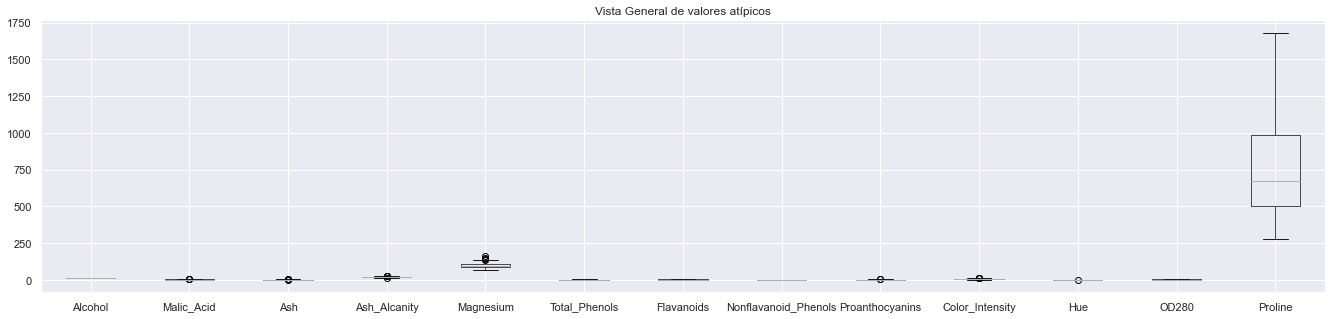

In [556]:
titulo_grafico= "Vista General de valores atípicos"
fig = plt.figure(figsize =(23, 5))
ds_wine.boxplot(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'])
plt.grid(True)
plt.title(titulo_grafico)
plt.show()

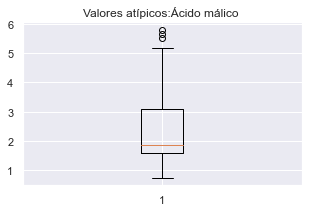

In [390]:
titulo_grafico= "Valores atípicos:Ácido málico "
fig = plt.figure(figsize =(5, 3))
plt.boxplot(ds_wine['Malic_Acid'])
plt.grid(True)
plt.title(titulo_grafico)
plt.show()

En base al Análisis de atributos mostrado con anterioridad, no se muestran valores atípicos para la columna 'Malic_Acid' ya que puede asumir valores entre 0 y 8 g/L.

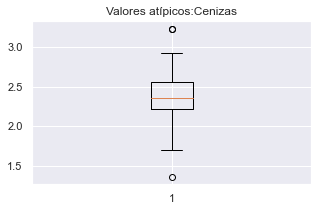

In [558]:
titulo_grafico= "Valores atípicos:Cenizas"
fig = plt.figure(figsize =(5, 3))
plt.boxplot(ds_wine['Ash'])
plt.grid(True)
plt.title(titulo_grafico)
plt.show()

En base al Análisis de atributos mostrado con anterioridad, hay valores atípicos en la columna de 'Ash' a corregir, ya que este atributo puede asumir valores entre 1 y 3 g/l, y se observan valores por encima de 3 g/l.

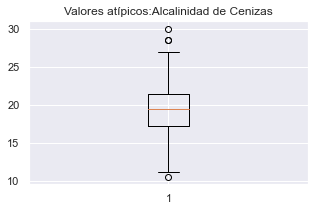

In [559]:
titulo_grafico= "Valores atípicos:Alcalinidad de Cenizas"
fig = plt.figure(figsize =(5, 3))
plt.boxplot(ds_wine['Ash_Alcanity'])
plt.grid(True)
plt.title(titulo_grafico)
plt.show()

En base al Análisis de atributos mostrado con anterioridad, no podemos considerar que haya valores atípicos para la columna 'Ash_Alcanity', ya que no hay un limite o tolerancia definida para este atributo del vino.

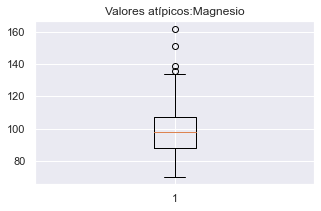

In [393]:
titulo_grafico= "Valores atípicos:Magnesio"
fig = plt.figure(figsize =(5, 3))
plt.boxplot(ds_wine['Magnesium'])
plt.grid(True)
plt.title(titulo_grafico)
plt.show()

En base al Análisis de atributos mostrado con anterioridad, no se muestran valores atípicos para la columna 'Magnesium' ya que puede asumir valores entre 50 y 200 mg/l.

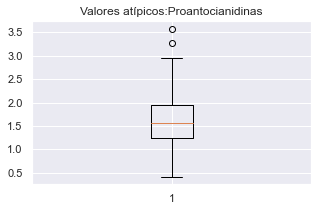

In [394]:
titulo_grafico= "Valores atípicos:Proantocianidinas"
fig = plt.figure(figsize =(5, 3))
plt.boxplot(ds_wine['Proanthocyanins'])
plt.grid(True)
plt.title(titulo_grafico)
plt.show()

En base al Análisis de atributos mostrado con anterioridad, no se muestran valores atípicos para la columna 'Proanthocyanins' ya que puede asumir valores entre 0.3 y 5.5 g/L  

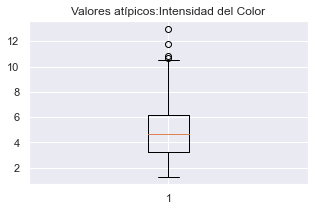

In [395]:
titulo_grafico= "Valores atípicos:Intensidad del Color"
fig = plt.figure(figsize =(5, 3))
plt.boxplot(ds_wine['Color_Intensity'])
plt.grid(True)
plt.title(titulo_grafico)
plt.show()

En base al Análisis de atributos mostrado con anterioridad, no se muestran valores atípicos para la columna'Color_Intensity'ya que la unidad de medida para este atributo no define un valor límite.

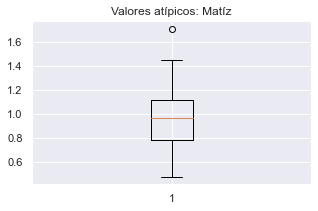

In [396]:
titulo_grafico= "Valores atípicos: Matíz"
fig = plt.figure(figsize =(5, 3))
plt.boxplot(ds_wine['Hue'])
plt.grid(True)
plt.title(titulo_grafico)
plt.show()

En base al Análisis de atributos mostrado con anterioridad, no se muestran valores atípicos para la columna "Hue" 
ya la unidad de medida de este atributo se distribuye a lo largo de una escala que va desde el 0 hasta el 14

__CORRECCIÓN DE VALORES ATÍPICOS__

Se pudo observar que hay outliers para el atributo "Cenizas" de la columna 'Ash', y que los valores outliers que son >3 (3.22 y 3.23), son muy cercanos al límite máximo del diagrama de cajas, por lo que la mejor opción al no tener otra evidencia, es asignarles igual valor que el límite máximo. Por lo tanto ambos outliers pasan a valer 2.75, como se puede visualizar a continuación.

In [560]:
ds_wine[ds_wine['Ash']>3]

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
25,13.05,2.05,3.22,25.0,124,2.63,2.68,0.47,1.92,3.58,1.13,3.20,830
121,11.56,2.05,3.23,28.5,119,3.18,5.08,0.47,1.87,6.00,0.93,3.69,465


In [565]:
outliers= ds_wine[ds_wine['Ash']>3]

ds_wine_copy=ds_wine.copy()
ds_wine_copy['Ash'] = winsorize(ds_wine_copy['Ash'],\
  limits = [0.05, 0.05], inplace = True)

# Imputación de outliers con la media
# median_value = ds_wine['Ash'].median()
# print(median_value)
# ds_wine_copy.loc[outliers.index,'Ash'] = median_value

In [566]:
ds_wine_copy[ds_wine['Ash']>3]

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
25,13.05,2.05,2.75,25.0,124,2.63,2.68,0.47,1.92,3.58,1.13,3.20,830
121,11.56,2.05,2.75,28.5,119,3.18,5.08,0.47,1.87,6.00,0.93,3.69,465


__DIAGRAMA DE DISPERSIÓN DE ATRIBUTOS__

Mediante este diagrama tenemos una primera visualización de la distribución. La mayoria de las relaciones entre atributos no siguen una distribuidas lineal, algunas muestran un sesgo negativo y unas pocas muestran una distribución bastante lineal donde existen algunas codependencias interesantes entre los atributos.

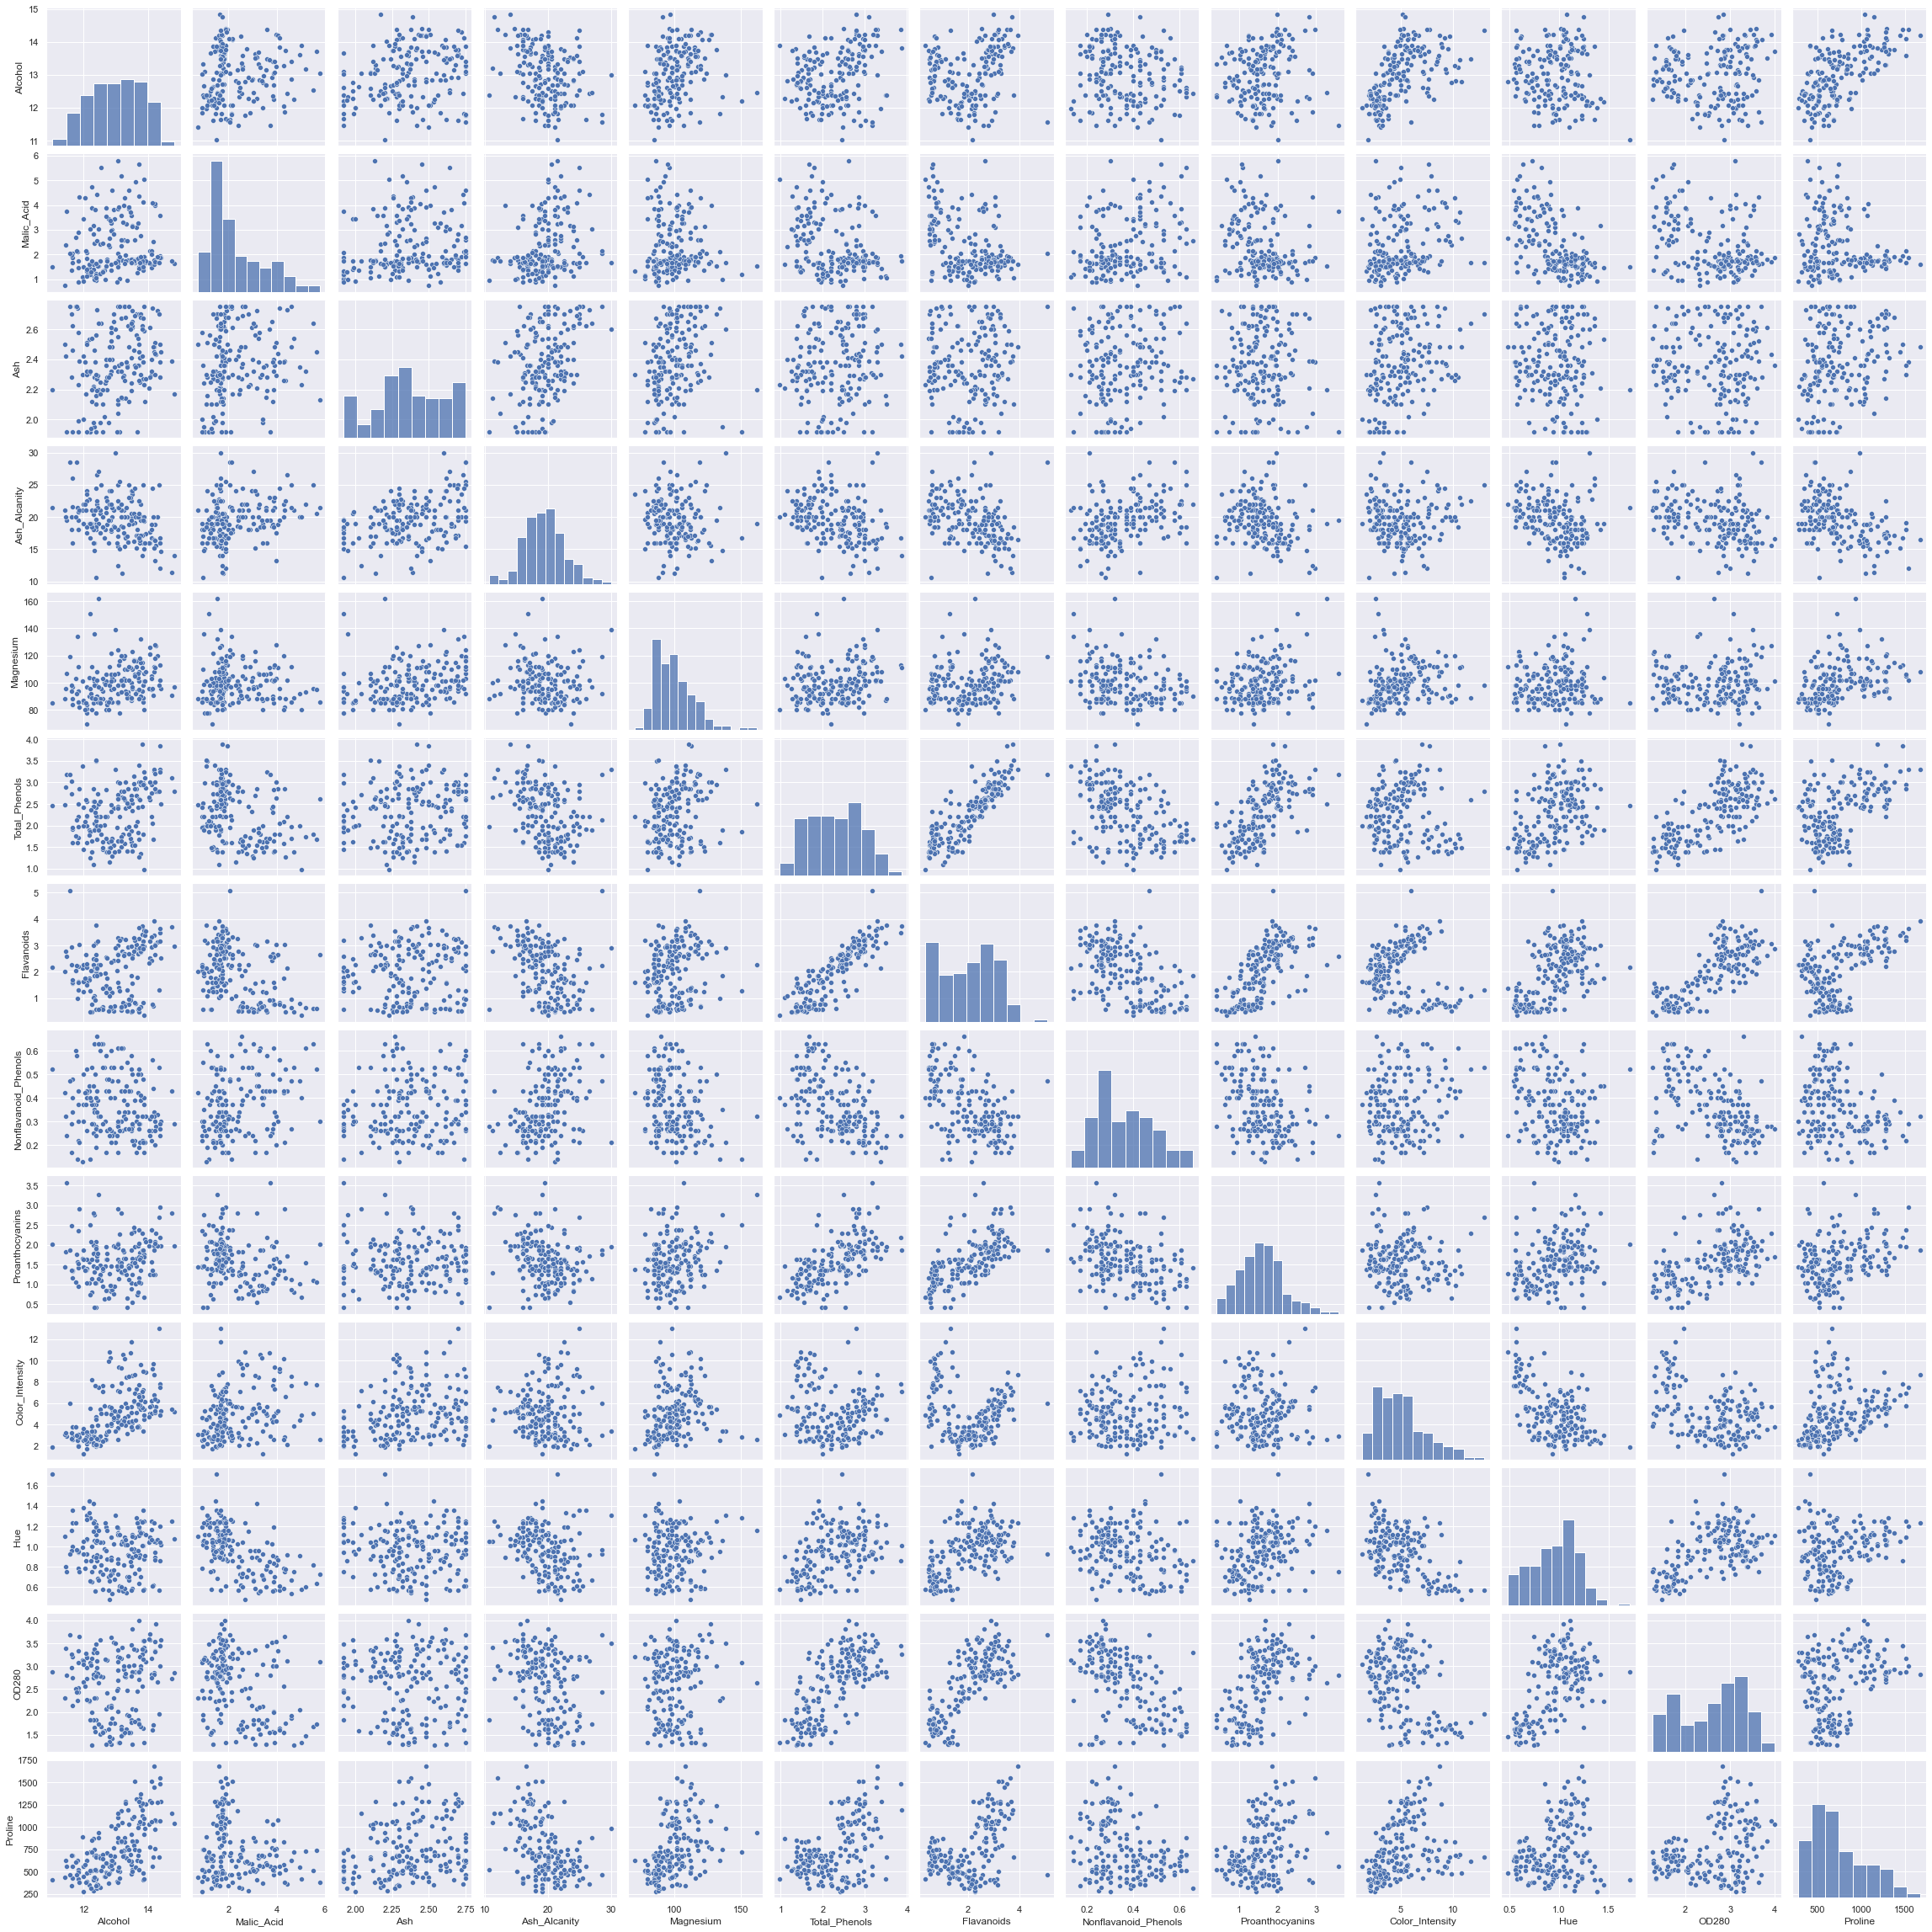

<Figure size 2160x1080 with 0 Axes>

In [640]:
sns.pairplot(ds_wine_copy)
plt.figure(figsize=(30,15))
sns.set (rc = {'figure.figsize':(40, 30)})

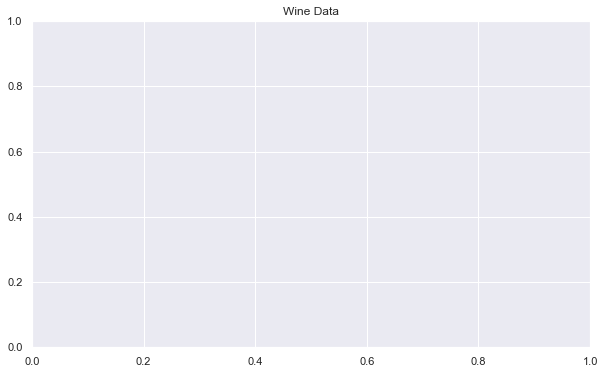

In [626]:
sns.set_palette('flare')
plt.figure(figsize=(10,6))
sns.scatterplot(ds_wine_copy= ds_wine_copy,palette='flare')
plt.title('Wine Data')
#plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

In [637]:
ds_wine_copy.corr(method = 'spearman') #correlación lineal, otros Met:"Kendal"/"spearmen"
print(ds_wine_copy.corr())

                       Alcohol  Malic_Acid       Ash  Ash_Alcanity  Magnesium  \
Alcohol               1.000000    0.094397  0.244247     -0.310235   0.270798   
Malic_Acid            0.094397    1.000000  0.159162      0.288500  -0.054575   
Ash                   0.244247    0.159162  1.000000      0.407555   0.280838   
Ash_Alcanity         -0.310235    0.288500  0.407555      1.000000  -0.083333   
Magnesium             0.270798   -0.054575  0.280838     -0.083333   1.000000   
Total_Phenols         0.289101   -0.335167  0.124535     -0.321113   0.214401   
Flavanoids            0.236815   -0.411007  0.074728     -0.351370   0.195784   
Nonflavanoid_Phenols -0.155929    0.292977  0.157831      0.361922  -0.256294   
Proanthocyanins       0.136698   -0.220746 -0.005360     -0.197327   0.236441   
Color_Intensity       0.546364    0.248985  0.274999      0.018732   0.199950   
Hue                  -0.071747   -0.561296 -0.074496     -0.273955   0.055398   
OD280                 0.0723

In [643]:
for a in range(len(ds_wine_copy.corr().columns)):
    for b in range(a):
        if abs(ds_wine_copy.corr().iloc[a,b]) >0.7:
            name = ds_wine_copy.corr().columns[a]
            print(name) 

Flavanoids
OD280


Estos datos podemos verlos más claramente mediante una Matriz de Correlación, tal como veremos a continuación.

__MATRIZ DE CORRELACIÓN__

Utilizando, correlación Spearman, selecciono esta correlación ya que es la mejor opción para cuando se presentan outliers, los atributos no necesariamente siguen una distribución normal y tampoco deben tener necesariamente una relación lineal.

El coeficiente de correlación lineal oscila entre -1 y +1, donde -1 significa una correlación negativa perfecta, +1 significa una correlación positiva perfecta y 0 significa que no hay correlación entre las variables.

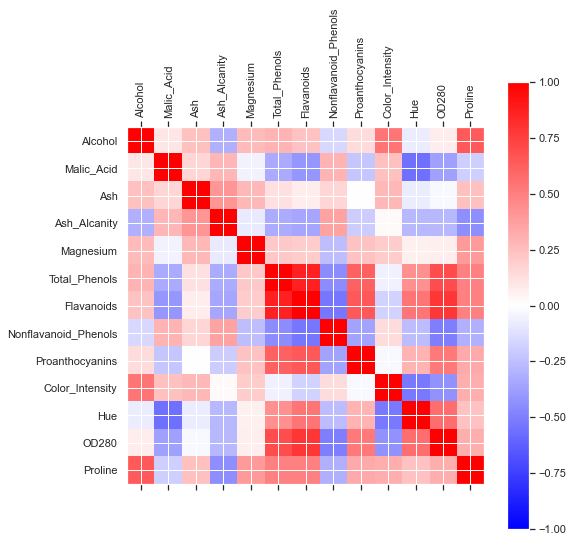

In [570]:
ds_wine_copy.corr(method = 'spearman') #correlación lineal
sns.set (rc = {'figure.figsize':(20, 8)})
plt.matshow(ds_wine_copy.corr(),cmap="bwr",vmin=-1,vmax=1)
plt.xticks(range(13),ds_wine_copy.columns, rotation=90)
plt.yticks(range(13),ds_wine_copy.columns)
plt.colorbar()

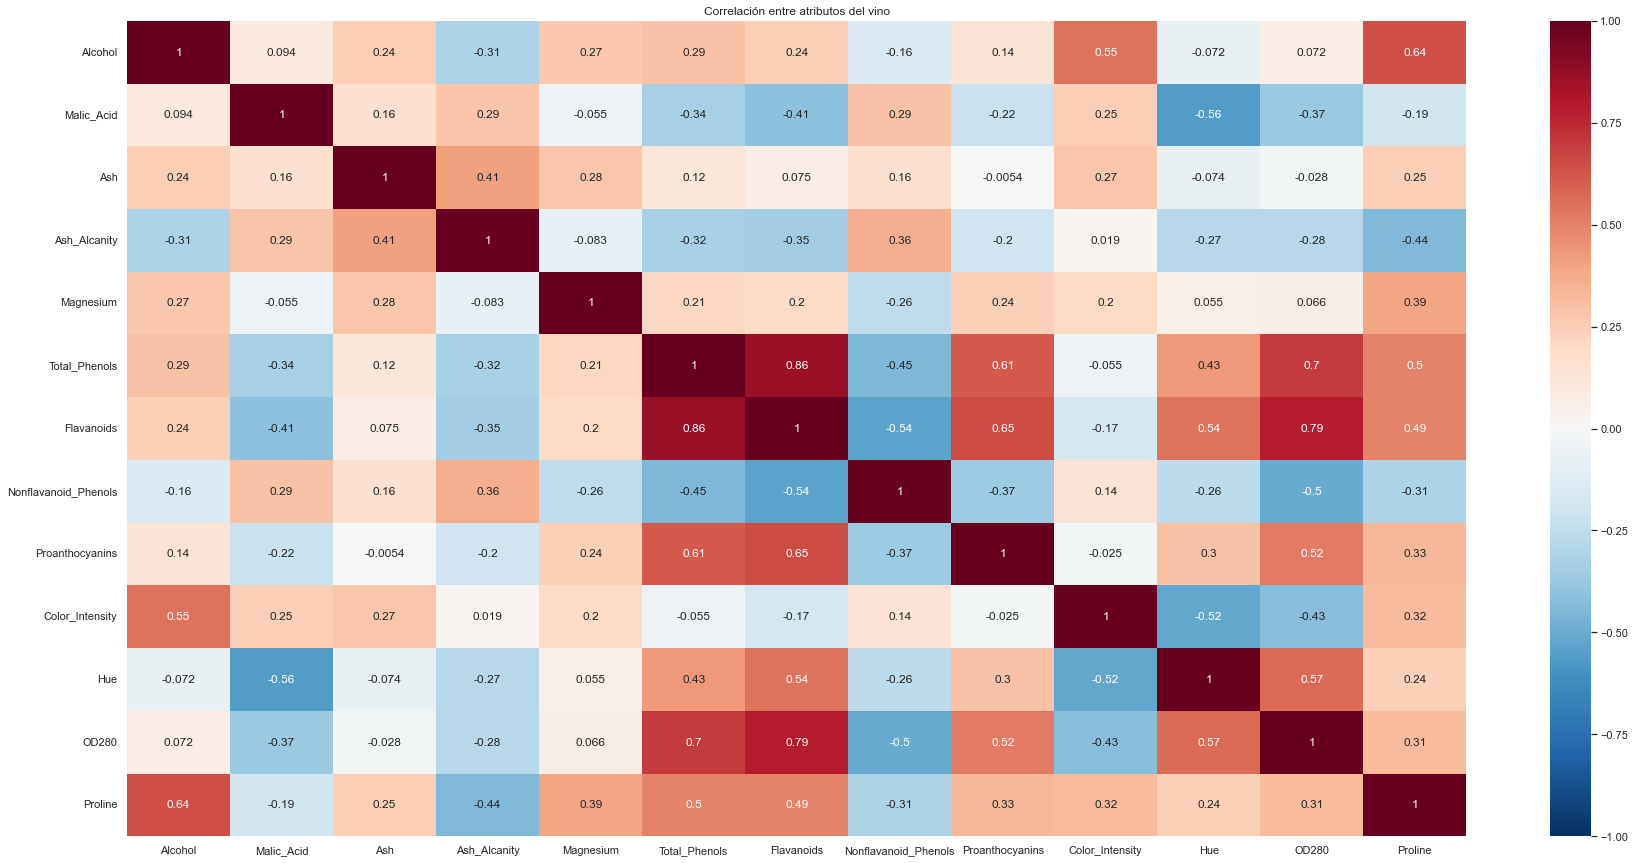

In [647]:
ds_wine_copy.corr(method = 'spearman')
sns.heatmap(ds_wine_copy.corr(), annot=True, cmap= 'RdBu_r', vmax=1, vmin=-1)
plt.title('Correlación entre atributos del vino')
sns.set (rc = {'figure.figsize':(30, 15)})
plt.show()

Los cuadrados con valores positivos, muestran correlaciones directas entre atributos. Cuanto más altos sean los valores, más fuertes serán estas relaciones y más rojizas. Es decir, si un atributo aumenta, el otro también tiende a aumentar y viceversa.
Los cuadrados que tienen valores negativos muestran una correlación inversa. Cuanto más negativos sean estos valores, más inversamente proporcionales serán y serán más azules. Esto significa que si el valor de un atributos es mayor, el valor del otro disminuye.
Y por último, los valores cercanos a cero indican que casi no hay codependencia entre el par de atributos.

De acuerdo a esto realizaremos el análisis de correlación entre atributos.

__ANÁLISIS DE CORRELACIONES ENTRE ATRIBUTOS__


_Analizaremos los coeficientes que destaca la Matriz_

_Los valores positivos más cercanos a 1 por encima de 0.5, que indican una correlaciones directas entre atributos son:_

   (0.86) Flavonoides vs Total de Fenoles = Podemos ver claramente en el diagrama de dispersión que ambos atributos crecen proporcionalmente debido a que, los Flavonoides son un tipos de compuestos fenólico, por lo tanto a mayor Flavonoides, mayor será el total de Fenoles y viceversa.
    Los Flavonoides son los responsables de aportar la astringencia y amargor al vino, que son los principales factores de calidad y autenticidad.
    
   (0.79) OD280 vs Flavonoides= OD280 es el método que determinar la concentración de proteínas y sabemos que,cuanto mayor sea la cantidad de proteínas, más amargo es el vino. Los Flavonoides son los responsables de la astringencia y amargor. Por lo tanto cuantos más proteínas es por que hay mayor proporción de Flavonoides y viceversa, esto también influye en la calidad del vino.
    
   (0.70) OD280 vs Total de Fenoles= Esta relación se puede simplificar diciendo que, si las proteínas aumentan por la cantidad de Flavonoides, y los Flavonoides son un tipo de Fenoles, podemos decir que cuanto mayor sea la cantidad total de Fenoles mayor proteínas que hallaremos mediante el método OD280 y viceversa.
   
   (0.65) Proantocianidinas vs Flavonoides= La Proantocianidinas es un tipo de Flavonoides, por lo tanto, ambos atributos crecerán o decrecerán proporcionalmente. Cada muestra de vino, contiene distintos Flavonoides, y la Proantocianidinas puede estar presente en un mayor o menor porcentaje en relación al total de Flavonoides.
    
   (0.64) Prolina Vs Alcohol= La Prolina es un aminoácido presente en abundancia en el jugo de uva y afecta el proceso de fermentación en la vinificación. El alcohol etílico proviene de la fermentación alcohólica del azúcar del jugo de uva, por lo tanto, su contenido está en relación directa con el porcentaje de azúcar de la uva de su madurez.
    Por lo tanto a mayor sea el Alcohol de la fermentación, mayor será la cantidad de Prolina y viceversa.
    
   (0.61) Proantocianidinas vs Total de Fenoles= Esta relación se puede simplificar diciendo que, si la Proantocianidinas es un Flavonoides y los Flavonoides son un compuesto Fenólico, podemos decir que cuanto mayor sea la cantidad de Proantocianidinas contenida en la muestra, tendrá mayor impacto en el Total de Fenoles y viceversa.
    
   (0.57) OD280 vs Matiz= La turbieza del vino es un parámetro que indica la transparencia y limpidez que va a tener el vino y que incide directamente en la calidad final del producto. La turbieza se refiere a la presencia de partículas en suspensión, que pueden ser levaduras, residuos vegetales, proteínas,etc. Por lo tanto, a mayor cantidad de proteínas detectadas por el método, mayor puede ser la turbieza del vino y viceversa.
    
   (0.55) Intensidad del color vs Alcohol= a intensidad del color del vino se refiere a la proporción de antocianinas. Y en el proceso de fermentación se genera alcohol que reduce la acidez y aumenta el ph, este aumento del ph pueden hacer cambiar el tono de las antocianinas y viceversa.
    
   (0.54) Matiz vs Flavonoides= Los Flavonoides son parte de los responsables de darle el color al vino ya que se encuentran en la piel de la uva. Permiten diferenciar un vino blanco de un vino tinto, generando distintos matices. Por lo cual si hay una relación directa entre las variables que puede ir variando en cada muestra.
    
   (0.52) OD280 vs Proantocianidinas= Cuanto mayor cantidad de proteínas revele el método, más amargo es el vino y viceversa. Y la Proantocianidinas es el flavonoide más importante, encontrado en la piel de la uva, que ayuda a la astringencia y amargor. Por lo tanto su relación proporcional es lógica.
    
_Los valores negativos más cercanos a -1 por encima de -0.5, que indican una correlaciones inversamente proporcional entre atributos son:_
       
   (-0.52) Matiz vs Intensidad del color= La intensidad del color esta dado por las antocianinas, las cuales son muy sensibles a las variaciones de pH,y el matiz se mide según el ph, por lo podemos decir que, los vinos con una tonalidad más fuerte (roja) tienen un pH más bajo y viceversa. En las muestras de este analisis, esta variación es muy baja.
   
   (0.54) Flavonoides vs No flavonoides= Ambos son Fenoles que se encuentran en distintas partes de la uva y puede existir alguna mínima diferencia si se tiene en cuenta que puede varias el volumen entre la piel y la pula de la uva, esta relación inversamente proporcional es casi imperceptible.
   
   (0.56) Matiz vs Ácido málico= A mayor Ácido málico los matices alcanzados obtendrán valores más bajos o claros y viceversa. Un vino blanco tiene mayor presencia de Ácido málico dando vivacidad, pero en un vino tinto afecta el equilibrio.

In [403]:
#scl = StandardScaler() #Estandarización de datos  #### faltan datos
#ds_wine[['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
#       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
#       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline']] = scl.fit_transform(ds_wine[['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
#       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
#       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline']])
#ds_wine.head()

__NORMALIZACIÓN DE ATRIBUTOS__

Se aplica la Normalización, para que todos los valores esten dentro del mismo rango, ya que hay valores muy dispares, por ejemplo, los de la columna 'Nonflavanoid_Phenols'con la columna 'Proline'.
Se restó a cada celda el valor min de su columna y lo divido entre la resta del valor max y min así todas las columnas tendrán un valor min= o y un valor max= 1 . 
Se muestra la diferencia entre la tabla sin normalizar y normalizada mediante la función describe()

In [434]:
ds_wine_copy.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366629,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.234908,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.920000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,2.750000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [604]:
ds_wine_norm=(ds_wine_copy-ds_wine_copy.min())/(ds_wine_copy.max()-ds_wine_copy.min())
ds_wine_norm.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,0.518584,0.315484,0.538107,0.458502,0.323278,0.453487,0.356386,0.437460,0.372523,0.322363,0.388170,0.491460,0.334446
std,0.213639,0.220780,0.283022,0.172142,0.155244,0.215811,0.210730,0.234818,0.180555,0.197806,0.185831,0.260070,0.224613
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.350658,0.170455,0.349398,0.340206,0.195652,0.262931,0.182489,0.264151,0.264984,0.165529,0.245935,0.244505,0.158702
50%,0.531579,0.222332,0.530120,0.458763,0.304348,0.474138,0.378692,0.396226,0.361199,0.290956,0.394309,0.553114,0.282097
75%,0.696711,0.462945,0.768072,0.561856,0.402174,0.627586,0.534810,0.580189,0.485804,0.419795,0.520325,0.695971,0.504280
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


                       Alcohol  Malic_Acid       Ash  Ash_Alcanity  Magnesium  \
Alcohol               1.000000    0.094397  0.244247     -0.310235   0.270798   
Malic_Acid            0.094397    1.000000  0.159162      0.288500  -0.054575   
Ash                   0.244247    0.159162  1.000000      0.407555   0.280838   
Ash_Alcanity         -0.310235    0.288500  0.407555      1.000000  -0.083333   
Magnesium             0.270798   -0.054575  0.280838     -0.083333   1.000000   
Total_Phenols         0.289101   -0.335167  0.124535     -0.321113   0.214401   
Flavanoids            0.236815   -0.411007  0.074728     -0.351370   0.195784   
Nonflavanoid_Phenols -0.155929    0.292977  0.157831      0.361922  -0.256294   
Proanthocyanins       0.136698   -0.220746 -0.005360     -0.197327   0.236441   
Color_Intensity       0.546364    0.248985  0.274999      0.018732   0.199950   
Hue                  -0.071747   -0.561296 -0.074496     -0.273955   0.055398   
OD280                 0.0723

## APRENDIZAJE NO SUPERVISADO  
- Identificación de Patrones o descubrimiento de caracteristicas-
  Clustering - Kmeans

Método del codo: 
Definición del mejor valor de K, calculando que tan similares son los individuaos dentro del los clusters. Aplico este metodo porque no cuento con información que me indique que cantidad de clusters debo formar y no cuento con politicas de negocio que me lo indiquen.

In [606]:
wcss= []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, max_iter=1000) 
    kmeans.fit(ds_wine_norm) #aplico kmeans al dataset
    wcss.append(kmeans.inertia_) # Inertia: Suma de distancias de muestras a su centro de conglomerado más cercano

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


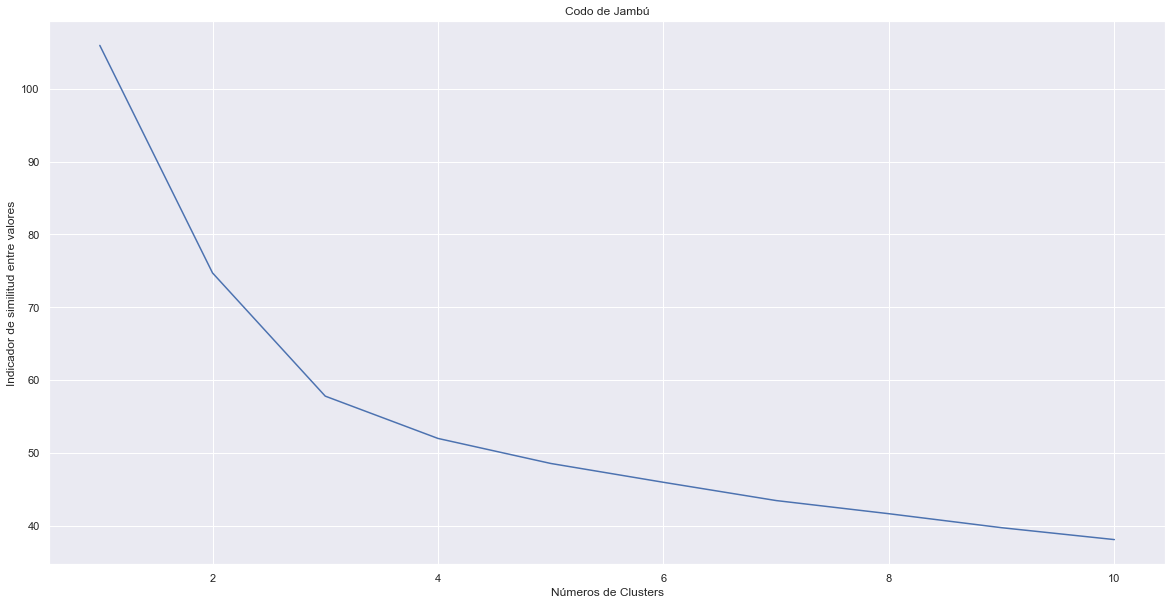

In [607]:
plt.plot(range(1,11),wcss)
plt.title("Codo de Jambú")
plt.xlabel('Números de Clusters')
plt.ylabel('Indicador de similitud entre valores')
plt.show()

Aplicación de método K-means:

In [609]:
clustering = KMeans(n_clusters=3)
clustering.fit(ds_wine_norm) #Creo y aplico el modelo

clustering_wine = clustering.labels_
print(labels) # Chequeo que este generando agrupaciones diferentes.Si lo ejecuto más de una vez va cambiando el grupo de valores pero sigue siendo lo mismo

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1
 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [611]:
ds_wine_norm_Kmeans=ds_wine_norm.copy()
ds_wine_norm_Kmeans["clustering_wine"]= clustering.labels_
ds_wine_norm_Kmeans.head(40) 

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,clustering_wine
0,0.842105,0.191700,0.614458,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341,0
1,0.571053,0.205534,0.265060,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642,0
2,0.560526,0.320158,0.903614,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933,0
3,0.878947,0.239130,0.698795,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347,0
4,0.581579,0.365613,1.000000,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35,0.644737,0.211462,0.590361,0.510309,0.326087,0.593103,0.556962,0.245283,0.457413,0.325939,0.455285,0.805861,0.457917,0
36,0.592105,0.177866,1.000000,0.252577,0.434783,0.558621,0.493671,0.396226,0.299685,0.283276,0.495935,0.553114,0.429387,0
37,0.531579,0.179842,0.759036,0.381443,0.304348,0.506897,0.440928,0.301887,0.324921,0.253413,0.520325,0.454212,0.589872,0
38,0.536842,0.150198,0.216867,0.252577,0.304348,0.489655,0.485232,0.283019,0.302839,0.206485,0.569106,0.520147,0.529244,1


Tecnica de Analisis de componentes principales PCA:
 Para reducir la cantidad de variables a analizar   

In [612]:
pca= PCA(n_components= 2)
pca_wine=pca.fit_transform(ds_wine_norm_Kmeans)
ds_pca_wine= pd.DataFrame(data= pca_wine, columns=['Componente_1', 'Componente_2']) #Dataframe con las 2 componentes principales
pca_name_wine= pd.concat([ds_pca_wine, ds_wine_norm_Kmeans[['clustering_wine']]], axis=1)#concateno las columnas

pca_name_wine

,Componente_1,Componente_2,clustering_wine
0,-1.163977,-0.211180,0
1,-1.047708,0.209454,0
2,-1.073699,-0.348338,0
3,-1.219067,-0.514749,0
4,-0.921566,-0.341004,0
...,...,...,...
173,1.285075,-0.462061,2
174,1.212712,-0.375855,2
175,1.241242,-0.369150,2
176,1.209075,-0.352750,2


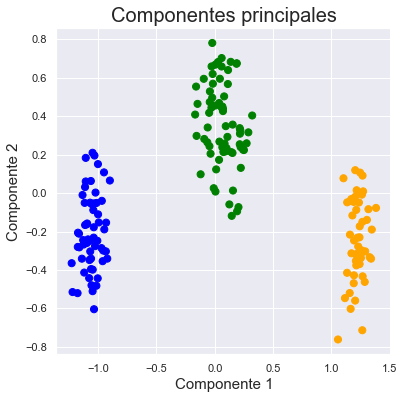

In [613]:
fig = plt.figure(figsize =(6,6))
ax= fig.add_subplot(1,1,1) 
ax.set_xlabel('Componente 1',fontsize= 15)
ax.set_ylabel('Componente 2',fontsize= 15)
ax.set_title('Componentes principales',fontsize= 20)

color_theme=np.array(["blue","green","orange"])
ax.scatter(x= pca_name_wine.Componente_1, y=pca_name_wine.Componente_2,c=color_theme[pca_name_wine.clustering_wine],s=50)
plt.show()

In [545]:
# Guardar el nuevo archivo generado con el clustering
ds_wine.to_csv('C:/Users/elnir/Downloads/1.2. Analisis Exploratorio_ok/Analisis Exploratorio 2024/WineClustering.csv')

In [590]:
# obtengo los centrides
centroides=clustering.cluster_centers_
centroides

array([[0.3255805 , 0.23764822, 0.38146704, 0.47308975, 0.24984015,
        0.43204868, 0.35740879, 0.4372919 , 0.37251809, 0.15062236,
        0.46336681, 0.54998923, 0.17169799],
       [0.70181191, 0.24220826, 0.64902232, 0.36175427, 0.41143977,
        0.64827586, 0.56391368, 0.30281472, 0.48094327, 0.35718682,
        0.481674  , 0.69735183, 0.58424733],
       [0.55832438, 0.5147213 , 0.61740841, 0.55869977, 0.31543922,
        0.24074595, 0.09661586, 0.60531382, 0.23755875, 0.51734345,
        0.16741331, 0.15392091, 0.24932312]])

In [591]:
centroides[0]

array([0.3255805 , 0.23764822, 0.38146704, 0.47308975, 0.24984015,
       0.43204868, 0.35740879, 0.4372919 , 0.37251809, 0.15062236,
       0.46336681, 0.54998923, 0.17169799])

In [615]:
atributos= ds_wine_norm.columns.values
atributos

array(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'],
      dtype=object)

In [616]:
def crear_graficos(clusters,j, colores):
    titulo= "Valores promedio del Cluster"+ str(clusters)
    plt.figure(j)
    plt.bar(atributos,centroides[clusters], color=colores)
    plt.title(titulo)
    plt.xticks(rotation=90)
    fig = plt.figure(figsize =(10,10))
    plt.show()

In [617]:
clusters=np.unique(clustering.labels_)
clusters

array([0, 1, 2])

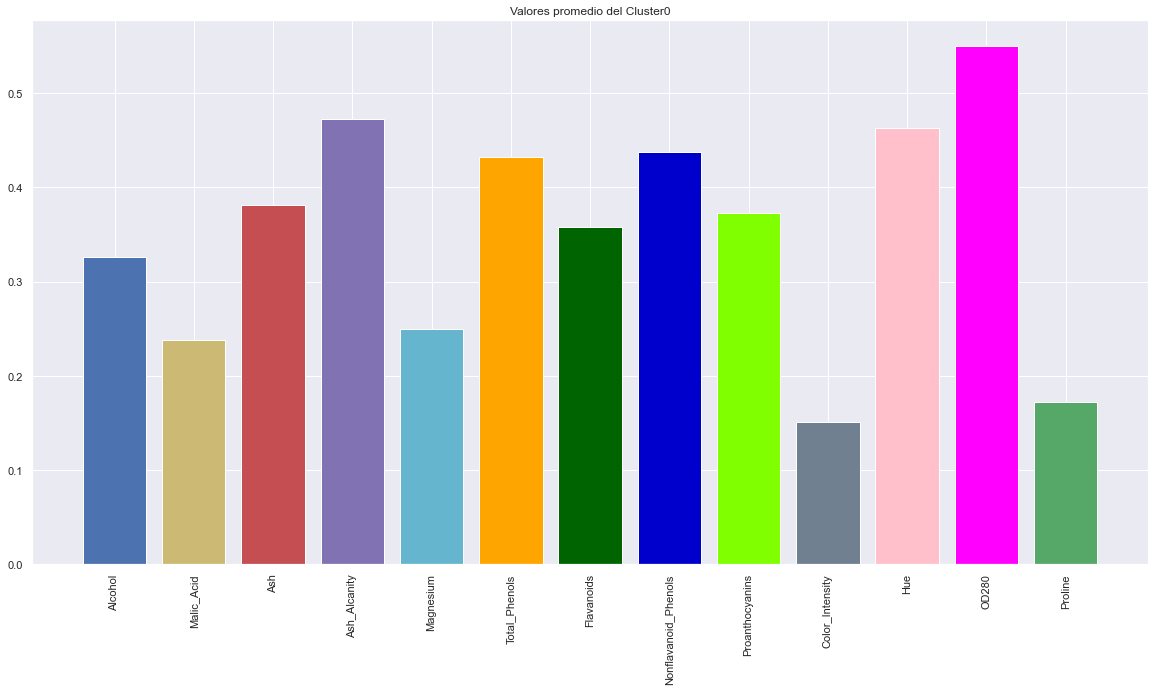

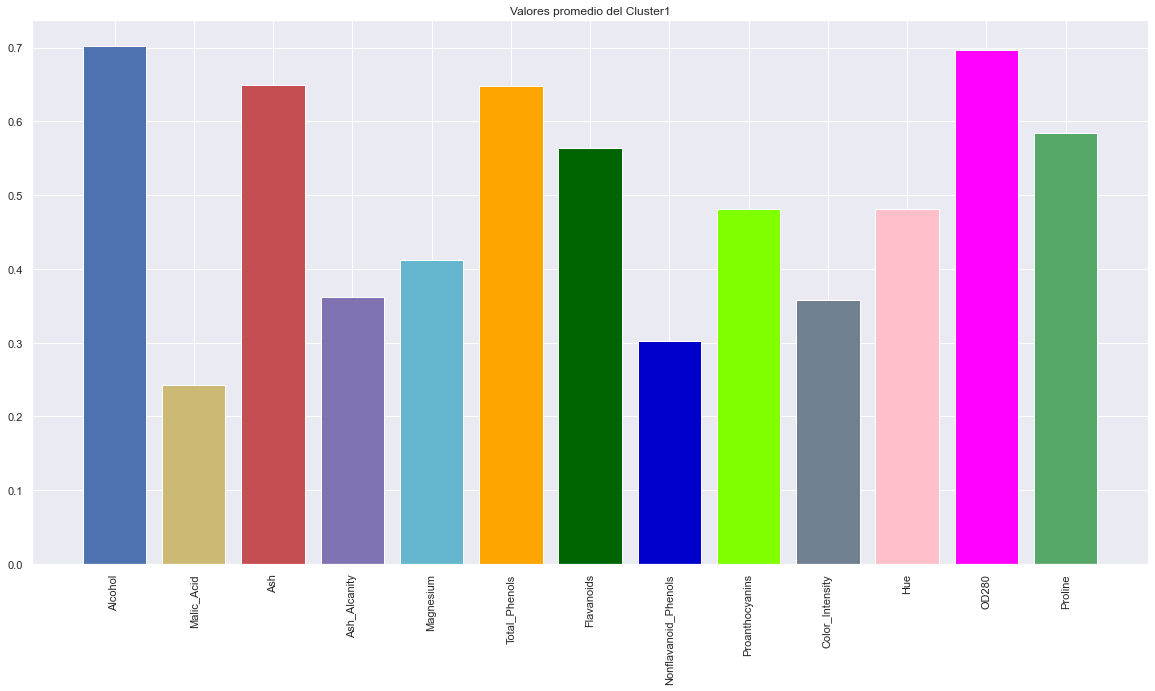

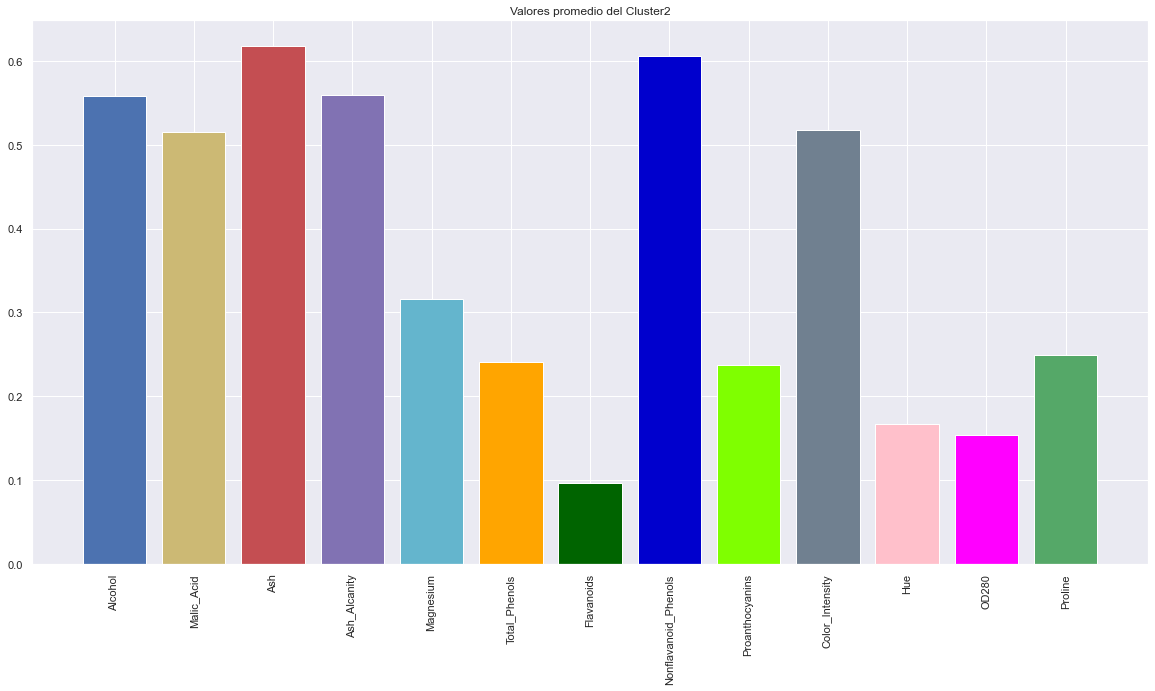

In [619]:
j = 0
colores= ['b','y','r','m','c','orange','darkgreen','mediumblue',
          'chartreuse','slategrey','pink','fuchsia','g']

for i in clusters:
    crear_graficos(i,j,colores)
    j += 1

En base a la visualización de los 3 gráficos podemos ver que atributos comparten las muestras para ser parte de una misma agrupación.

_Para el cluster 0:_
Podemos observar que tienen indices de estabilidad muy altos dado por OD280 .
Tienen un alto índice de seguridad que identificar la no adulteración mediante la Alcalinidad de cenizas. 
Son de una tinte más azulado y baja acidez de acuerdo a su Matiz.
En relación a los componentes Fenólicos, el total de Fenoles es intermedio, cuidando propiedades como color,sabor amargo y astringencia.
La Prolina es baja por lo que son más amargos.
La graduación alcóholica es más baja que en los grupos restantes.
Tienen poca presencia de Ácido málico responsables del equilibrio de sabores y conservación del vino. Un vino blanco tiene mayor presencia de Ácido málico dando vivacidad, pero en un vino tinto afecta el equilibrio, lo cual justificaría su disminución.
Y es notorio que la Intensidad del color es más pálida.

_Para el cluster 1:_
Podemos observar que la graduación alcóholica es la más alta entre los grupos.
Tienen indices de estabilidad muy altos dado por OD280.
Tienen un índice intermedio de seguridad en relación a adulteración que se identifica mediante la Alcalinidad de cenizas, y una elevada cantidad de cenizas. 
En relación a los componentes Fenólicos, el total de Fenoles es alto, intensificando propiedades como color, sabor amargo y astringencia.
Tiene una Prolina alta, lo cual aumenta la dulzura, la viscosidad y el sabor del fruto, disminuye el amargor y la astringencia.  
Y es notoria la poca presencia de Ácido málico responsables del equilibrio de sabores y conservación del vino. Un vino blanco tiene mayor presencia de Ácido málico dando vivacidad, pero en un vino tinto afecta el equilibrio, lo cual justificaría su disminución.

_Para el cluster 2:_
Podemos observar una gran cantidad de Residuos orgánicos, cenizas.
Tienen un índice alto de seguridad en relación a adulteración que se identifica mediante la Alcalinidad de cenizas. 
Tiene una la graduación alcóholica alta.
En relación a los componentes Fenólicos, el total de Fenoles es bajo, sin intensificar propiedades como color, sabor amargo y astringencia. 
Y en cambio tiene alta cantidad de No Flavonoides.
La cantidad de cenizas y No Flavanoides pueden dar una alta Intensidad de color.
Y se destaca que tiene un indices de estabilidad muy bajo dado por OD280.

## Conclusiones

Podemos decir que se trabajo con un dataset en buenas condiciones, sobre el cual fueron mínimas las trasformación y manipulación necesaria para poder profundizar en el análisis, como por ejemplo se aplico la corrección de Outliers.
Se encontraron atributos muy dispersos entre si, por lo que se aplicó la normalización de los datos para evitar inconvenientes en los cálculos posteriores.

La amplia investigación de los atributos nos permite conocer sobre el contexto y las principales necesidades y puntos de inflexión para la Industria Vitivinícola.
Mediante un análisis de correlación entre atributos podemos brindar información importante a los responsables de llevar a cabo las mejores combinaciones en el laboratorio, y resaltando los puntos donde hacer foco al momento de mezclar atributos, que al hacer un análisis de estas características se puede disminuir la cantidad de pruebas y error, y que puede abrir a nuevas investigaciones.
Para elaborar un vino es fundamental lograr un equilibrio de los ingredientes y procesos, ya que quedá muy claro que los atributos están fuertemente ligados, afectando uno a los otros.

Debido a que no se contaba con información sobre la clasificación de los vinos,se aplico la técnica de agrupamiento K-Means con el método del codo, ya que este método es el más preciso al momento de identificar la cantidad de clasters a diferenciar.
Como podemos observar se identificaron 3 clusters, donde los vinos comparten caracteristicas entre si,
En base al análisis de los atributos del contexto y en base al análisis de los resultados arrojados por K-means podemos decir que el sentido de agrupación de los clusters puede deberse a la calidad del vino, diferenciando 3 niveles de calidad: alta (Cluster 0), intermedia (Cluster 1) y baja (Cluster 2).

Para la elaboración de este análisis se han consultado las fuentes digitales que se detallan a continuación. Para mejorar los resultados,en una próxima etapa se considerarán fuentes especializadas en el rubro, como Enólogos y personas involucradas en las distintos etapas del proceso. 

Para cerrar este análisis, podemos decir que:
          -Hacer un vino es un arte compartido entre los humanos y la naturaleza.-

Fuentes de Investigación:
https://www.triunfacontuvino.es/componentes-del-vino-cuales-son-y-como-detectarlos-cuando-catamos/
https://www.infoagro.com/viticultura/vino/analisis_vinos2.htm
https://prezi.com/xxqfonrz1w89/analisis-quimico-de-los-vinos/
https://www.aprenderdevino.es/ph-y-vino/
https://www.argentina.gob.ar/sites/default/files/determinaciones_analiticas_metodos_limites_y_tolerancias_-pag._web.pdf
https://core.ac.uk/download/pdf/335289779.pdf
https://www.cdrfoodlab.es/cdrwinelab/analisis/taninos-vino
https://www.tdx.cat/bitstream/handle/10803/8512/Tesis7deoctubrede2002.pdf?sequence=1
https://cientisol.com/guia-definitiva-sobre-el-analisis-quimico-del-vino-que-parametros-hay-que-medir-y-como-hacerlo/